In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action = "ignore")

In [3]:
df = pd.read_csv("D:\\Data Science intern\\project\\dataset (1).csv")
df.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,is_claim,segment,model,...,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,0,A,M1,...,No,No,No,No,Yes,No,No,No,Yes,0
1,ID00002,0.672619,0.02,0.375000,C2,"27003""",1,0,A,M1,...,No,No,No,No,Yes,No,No,No,Yes,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,0,A,M1,...,No,No,No,No,Yes,No,No,No,Yes,0
3,ID00004,0.900277,0.11,0.432692,C4,"21622""",1,0,C1,M2,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,0,A,M3,...,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2


# part 1) FEATURE ENGINEERING AND MODEL BUILDING

## 1) Data cleaning 
## 2) EDA 
## 3) Data modeling 

In [7]:
df.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,is_claim,segment,model,...,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,0,A,M1,...,No,No,No,No,Yes,No,No,No,Yes,0
1,ID00002,0.672619,0.02,0.375000,C2,"27003""",1,0,A,M1,...,No,No,No,No,Yes,No,No,No,Yes,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,0,A,M1,...,No,No,No,No,Yes,No,No,No,Yes,0
3,ID00004,0.900277,0.11,0.432692,C4,"21622""",1,0,C1,M2,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,0,A,M3,...,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2


In [9]:
df.tail()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,is_claim,segment,model,...,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating
30095,ID30096,1.050000,0.15,0.336538,C8,8794,3,0,C2,M4,...,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3
30096,ID30097,0.394044,0.05,0.500000,C2,27003,1,0,B2,M6,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2
30097,ID30098,1.112236,0.05,0.528846,C2,27003,2,0,A,M3,...,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2
30098,ID30099,0.160614,0.03,0.778846,C16,16206,1,0,A,M1,...,No,No,No,No,Yes,No,No,No,Yes,0
30099,ID30100,0.087295,0.04,0.346154,C5,34738,3,0,C2,M4,...,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30100 entries, 0 to 30099
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         30100 non-null  object 
 1   policy_tenure                     30100 non-null  float64
 2   age_of_car                        30100 non-null  float64
 3   age_of_policyholder               30100 non-null  float64
 4   area_cluster                      30100 non-null  object 
 5   population_density                30100 non-null  object 
 6   make                              30100 non-null  int64  
 7   is_claim                          30100 non-null  int64  
 8   segment                           30100 non-null  object 
 9   model                             30100 non-null  object 
 10  fuel_type                         30100 non-null  object 
 11  max_torque                        30100 non-null  object 
 12  max_

In [13]:
df.describe()

,policy_tenure,age_of_car,age_of_policyholder,make,is_claim,airbags,displacement,cylinder,gear_box,turning_radius,height,ncap_rating
count,30100.000000,30100.000000,30100.000000,30100.000000,30100.000000,30100.000000,30100.000000,30100.000000,30100.000000,30100.000000,30100.000000,30100.000000
mean,0.612097,0.069436,0.469028,1.758272,0.064086,3.122757,1160.974784,3.625748,5.241462,4.851390,1552.829136,1.755748
std,0.414670,0.056833,0.122673,1.136681,0.244911,1.825846,265.800505,0.483937,0.427977,0.227145,79.500408,1.391911
min,0.002739,0.000000,0.288462,1.000000,0.000000,1.000000,796.000000,3.000000,5.000000,4.500000,1475.000000,0.000000
25%,0.207099,0.020000,0.365385,1.000000,0.000000,2.000000,796.000000,3.000000,5.000000,4.600000,1475.000000,0.000000
50%,0.575252,0.060000,0.451923,1.000000,0.000000,2.000000,1197.000000,4.000000,5.000000,4.800000,1530.000000,2.000000
75%,1.040013,0.110000,0.548077,3.000000,0.000000,6.000000,1493.000000,4.000000,5.000000,5.000000,1635.000000,3.000000
max,1.376478,1.000000,0.971154,5.000000,1.000000,6.000000,1498.000000,4.000000,6.000000,5.200000,1825.000000,5.000000


In [15]:
df.isna().sum()

policy_id                           0
policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
is_claim                            0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radi

In [17]:
# convert categorical data into numerical or float values
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()

for col in df.select_dtypes(include = 'object').columns:
    df[col] = lb.fit_transform(df[col].astype(str))

df.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,is_claim,segment,model,...,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating
0,0,0.515874,0.05,0.644231,0,22,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,1,0.672619,0.02,0.375000,11,10,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,2,0.841110,0.02,0.384615,15,19,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,3,0.900277,0.11,0.432692,16,8,1,0,3,3,...,1,1,1,1,1,1,1,1,1,2
4,4,0.596403,0.11,0.634615,17,15,2,0,0,4,...,0,0,1,1,1,0,1,1,1,2


In [19]:
df.tail()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,is_claim,segment,model,...,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating
30095,30095,1.050000,0.15,0.336538,20,32,3,0,4,5,...,1,1,1,1,1,1,0,1,1,3
30096,30096,0.394044,0.05,0.500000,11,9,1,0,2,7,...,0,1,1,1,1,1,1,1,1,2
30097,30097,1.112236,0.05,0.528846,11,9,2,0,0,4,...,0,0,1,1,1,0,1,1,1,2
30098,30098,0.160614,0.03,0.778846,7,2,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
30099,30099,0.087295,0.04,0.346154,17,15,3,0,4,5,...,1,1,1,1,1,1,0,1,1,3


In [21]:
df.corr()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,is_claim,segment,model,...,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating
policy_id,1.000000,0.000142,0.005894,-0.006250,0.006500,-0.008347,-0.001984,-0.004494,0.003263,0.009389,...,-0.005637,0.007293,0.010456,0.010456,0.001714,0.007029,0.010737,0.010456,0.006650,0.008038
policy_tenure,0.000142,1.000000,0.171386,0.147808,0.029256,0.134079,0.088044,0.079154,0.174293,0.200770,...,0.111140,0.190827,0.234621,0.234621,0.018942,0.196219,0.120357,0.234621,-0.008766,0.176408
age_of_car,0.005894,0.171386,1.000000,-0.029554,0.051299,0.141139,0.191988,-0.031418,0.364967,0.371670,...,0.228907,0.356867,0.440346,0.440346,-0.014230,0.366733,0.200239,0.440346,-0.051810,0.352992
age_of_policyholder,-0.006250,0.147808,-0.029554,1.000000,0.007507,0.026120,-0.039068,0.019070,-0.026721,-0.055737,...,-0.033610,0.021891,-0.047953,-0.047953,0.021997,0.007333,0.000302,-0.047953,0.013996,-0.040925
area_cluster,0.006500,0.029256,0.051299,0.007507,1.000000,0.016374,0.031889,0.013325,0.063702,0.060781,...,0.037005,0.067607,0.074240,0.074240,0.004794,0.065923,0.025653,0.074240,-0.008705,0.061837
population_density,-0.008347,0.134079,0.141139,0.026120,0.016374,1.000000,0.074945,0.000886,0.170874,0.164441,...,0.094383,0.182134,0.195369,0.195369,0.001829,0.181585,0.087334,0.195369,0.000053,0.155705
make,-0.001984,0.088044,0.191988,-0.039068,0.031889,0.074945,1.000000,-0.000323,0.606243,0.264893,...,0.685299,0.131077,0.412381,0.412381,0.096824,0.340879,-0.190536,0.412381,-0.157604,0.791784
is_claim,-0.004494,0.079154,-0.031418,0.019070,0.013325,0.000886,-0.000323,1.000000,0.006127,0.004136,...,0.002712,0.011170,0.005559,0.005559,0.004579,0.008654,0.002048,0.005559,0.007244,0.004304
segment,0.003263,0.174293,0.364967,-0.026721,0.063702,0.170874,0.606243,0.006127,1.000000,0.441482,...,0.747771,0.687104,0.615424,0.615424,-0.285435,0.743918,0.000082,0.615424,-0.054835,0.663910
model,0.009389,0.200770,0.371670,-0.055737,0.060781,0.164441,0.264893,0.004136,0.441482,1.000000,...,0.258807,0.474443,0.885287,0.885287,0.165917,0.600946,0.551682,0.885287,0.066396,0.611042


<Axes: >

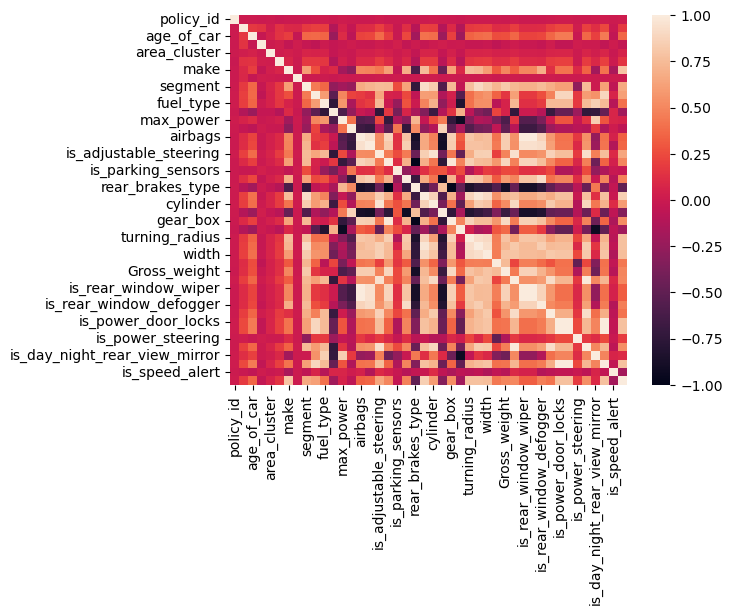

In [23]:
sns.heatmap(df.corr())

<Axes: >

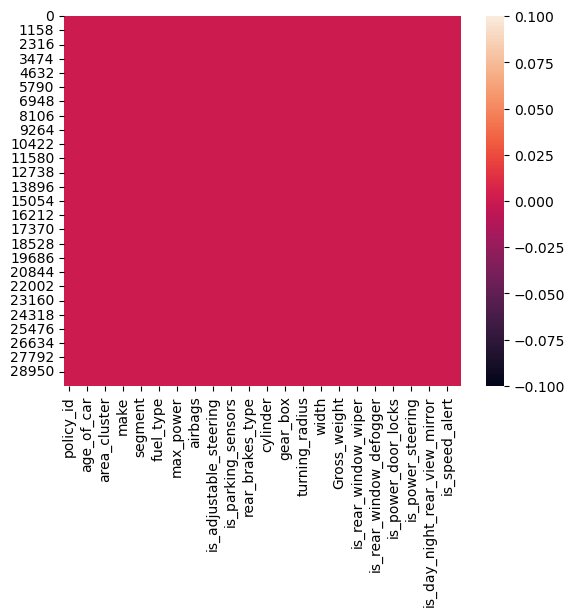

In [25]:
sns.heatmap(df.isna())

In [26]:
# save the cleaned data
df.to_csv("cleaned_data.csv", index=False)

In [28]:
## improve the columns numbers for improve the accuracy of model

dummies_col = ['area_cluster' , 'segment' , 'fuel_type' , 'engine_type' , 'rear_brakes_type' , 'transmission_type' , 'steering_type' , 'model']
df = pd.get_dummies(df , columns = dummies_col , drop_first = True , dtype = int)
df

,policy_id,policy_tenure,age_of_car,age_of_policyholder,population_density,make,is_claim,max_torque,max_power,airbags,...,model_1,model_2,model_3,model_4,model_5,model_6,model_7,model_8,model_9,model_10
0,0,0.515874,0.05,0.644231,22,1,0,5,2,2,...,0,0,0,0,0,0,0,0,0,0
1,1,0.672619,0.02,0.375000,10,1,0,5,2,2,...,0,0,0,0,0,0,0,0,0,0
2,2,0.841110,0.02,0.384615,19,1,0,5,2,2,...,0,0,0,0,0,0,0,0,0,0
3,3,0.900277,0.11,0.432692,8,1,0,0,6,2,...,0,0,1,0,0,0,0,0,0,0
4,4,0.596403,0.11,0.634615,15,2,0,8,5,2,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30095,30095,1.050000,0.15,0.336538,32,3,0,4,0,6,...,0,0,0,0,1,0,0,0,0,0
30096,30096,0.394044,0.05,0.500000,9,1,0,0,6,2,...,0,0,0,0,0,0,1,0,0,0
30097,30097,1.112236,0.05,0.528846,9,2,0,8,5,2,...,0,0,0,1,0,0,0,0,0,0
30098,30098,0.160614,0.03,0.778846,2,1,0,5,2,2,...,0,0,0,0,0,0,0,0,0,0


In [31]:
df.columns

Index(['policy_id', 'policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density', 'make', 'is_claim', 'max_torque', 'max_power',
       'airbags', 'is_esc', 'is_adjustable_steering', 'is_tpms',
       'is_parking_sensors', 'is_parking_camera', 'displacement', 'cylinder',
       'gear_box', 'turning_radius', 'Length', 'width', 'height',
       'Gross_weight', 'is_front_fog_lights', 'is_rear_window_wiper',
       'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist',
       'is_power_door_locks', 'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating', 'area_cluster_1',
       'area_cluster_2', 'area_cluster_3', 'area_cluster_4', 'area_cluster_5',
       'area_cluster_6', 'area_cluster_7', 'area_cluster_8', 'area_cluster_9',
       'area_cluster_10', 'area_cluster_11', 'area_cluster_12',
       'area_cluster_13', 'area_cluster_14', 'area_clu

# 4) Model building

In [34]:
x = df.drop(['is_claim'] , axis = 1)
y = df['is_claim']

In [36]:
# 1) split and train the data 
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x,y,train_size = 0.8 , random_state = 42 , stratify=y) 

In [38]:
pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [39]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

x_train, y_train = smote.fit_resample(x_train, y_train)


### Logistic regression

In [43]:
from sklearn.linear_model import LogisticRegression

LogisticRegression_model = LogisticRegression()
LogisticRegression_model.fit(x_train , y_train)

LogisticRegression()

In [45]:
LogisticRegression_model_predict = LogisticRegression_model.predict(x_test)
LogisticRegression_model_predict

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

### KNN

In [48]:
from sklearn.neighbors import KNeighborsClassifier
KNeighborsClassifier_model = KNeighborsClassifier(n_neighbors = 100)
KNeighborsClassifier_model.fit(x_train , y_train)

KNeighborsClassifier(n_neighbors=100)

In [50]:
KNeighborsClassifier_model_predict = KNeighborsClassifier_model.predict(x_test)
KNeighborsClassifier_model_predict

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

### SVM

In [53]:
from sklearn.svm import SVC
SVC_model = SVC()
SVC_model.fit(x_train , y_train)

SVC()

In [55]:
SVC_model_predict = SVC_model.predict(x_test)
SVC_model_predict

array([1, 1, 0, ..., 1, 0, 1], dtype=int64)

### Decision tree

In [57]:
from sklearn.tree import DecisionTreeClassifier
DecisionTreeClassifier_model = DecisionTreeClassifier()
DecisionTreeClassifier_model.fit(x_train , y_train)

DecisionTreeClassifier()

In [58]:
DecisionTreeClassifier_model_predict = DecisionTreeClassifier_model.predict(x_test)
DecisionTreeClassifier_model_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [59]:
from sklearn.metrics import accuracy_score

logistic_accuracy = accuracy_score(LogisticRegression_model_predict , y_test)
KNN_accuracy = accuracy_score(KNeighborsClassifier_model_predict , y_test)
SVM_accuracy = accuracy_score(SVC_model_predict , y_test)
Decision_accuracy = accuracy_score(DecisionTreeClassifier_model_predict , y_test)
print(f"logistic_accuracy : {logistic_accuracy * 100:.2f}%")
print(f" KNN accuracy : {KNN_accuracy * 100:.2f}%")
print(f"SVM_accuracy : {SVM_accuracy * 100:.2f}%")
print(f"decision_accuracy : {Decision_accuracy * 100:.2f}%")

logistic_accuracy : 68.97%
 KNN accuracy : 52.74%
SVM_accuracy : 38.87%
decision_accuracy : 85.88%


In [64]:
# store accuracies
accuracy_dict = {
    "Logistic Regression": logistic_accuracy,
    "KNN": KNN_accuracy,
    "SVM": SVM_accuracy,
    "Decision Tree": Decision_accuracy
}

# find best model
best_model = max(accuracy_dict, key=accuracy_dict.get)
best_accuracy = accuracy_dict[best_model]

# print all accuracies
print(f"logistic_accuracy : {logistic_accuracy * 100:.2f}%")
print(f"KNN accuracy : {KNN_accuracy * 100:.2f}%")
print(f"SVM_accuracy : {SVM_accuracy * 100:.2f}%")
print(f"decision_accuracy : {Decision_accuracy * 100:.2f}%")

# print best accuracy
print("\nBest Model:")
print(f"{best_model} with accuracy = {best_accuracy * 100:.2f}%")


logistic_accuracy : 68.97%
KNN accuracy : 52.74%
SVM_accuracy : 38.87%
decision_accuracy : 85.88%

Best Model:
Decision Tree with accuracy = 85.88%
